In [131]:
import os
import numpy as np
import pandas as pd
from osgeo import gdal
import matplotlib.pyplot as plt
# netCDF4 needs to be installed in your environment for this to work
import xarray as xr
import rioxarray as rio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et
# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [2]:
district_path = "convert\\districts"
mandal_path = "convert\\mandals"

In [3]:
district_dataset = [ds for ds in os.listdir(district_path) if ds[-8:] == '.geojson']
mandal_dataset = [ds for ds in os.listdir(mandal_path) if ds[-8:] == '.geojson']

# District Anomalies

In [4]:
len(district_dataset)

871

In [108]:
sample =  gpd.read_file(district_path + "/" + district_dataset[870])

In [109]:
sample.head(2)

,Area,Dist_Name,uid,zonalstat,geometry
0,6974.142517,Bhadradri Kothagudem,TDID1,"{'min': 0.479767, 'max': 0.717438, 'mean': 0.5...","POLYGON ((80.91930 17.21950, 80.93816 17.21971..."
1,2853.088839,Jagtial,TDID2,"{'min': -0.767456, 'max': -0.222992, 'mean': -...","POLYGON ((79.29767 18.81833, 79.27566 18.82538..."


In [45]:
district_df = pd.DataFrame()

In [46]:
final_data = []

for i in range(0,len(district_dataset)): #for each year
    x = gpd.read_file(district_path + "/" + district_dataset[i])
    district_df["District"] = x["Dist_Name"]
    d_data =  []
    for j in range(0, len(x)): #get one district at a time 
        d_data.append(x["zonalstat"][j]["mean"])
    final_data.append(d_data)
    #print(x["Dist_Name"][0])
    #print(x["zonalstat"][0]["max"])

In [47]:
district_df = pd.DataFrame(final_data)

In [48]:
district_df = district_df.T

In [49]:
district_df["District"] = sample["Dist_Name"]
district_df["geometry"] = sample["geometry"]
district_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,863,864,865,866,867,868,869,870,District,geometry
0,0.142688,-0.861804,-2.050185,-0.078684,3.088809,-0.706553,-0.487862,0.153993,0.137098,0.586044,...,0.557679,0.966857,1.230470,1.562838,0.946137,0.491837,0.594343,0.594343,Bhadradri Kothagudem,"POLYGON ((80.91930 17.21950, 80.93816 17.21971..."
1,0.306460,-1.229686,-3.205895,0.152429,2.971262,-0.513356,-0.110574,0.040461,-0.224992,0.401134,...,0.592269,1.738015,2.055243,1.413674,0.545908,0.321412,-0.476008,-0.476008,Jagtial,"POLYGON ((79.29767 18.81833, 79.27566 18.82538..."


In [50]:
len(district_df.iloc[0])

873

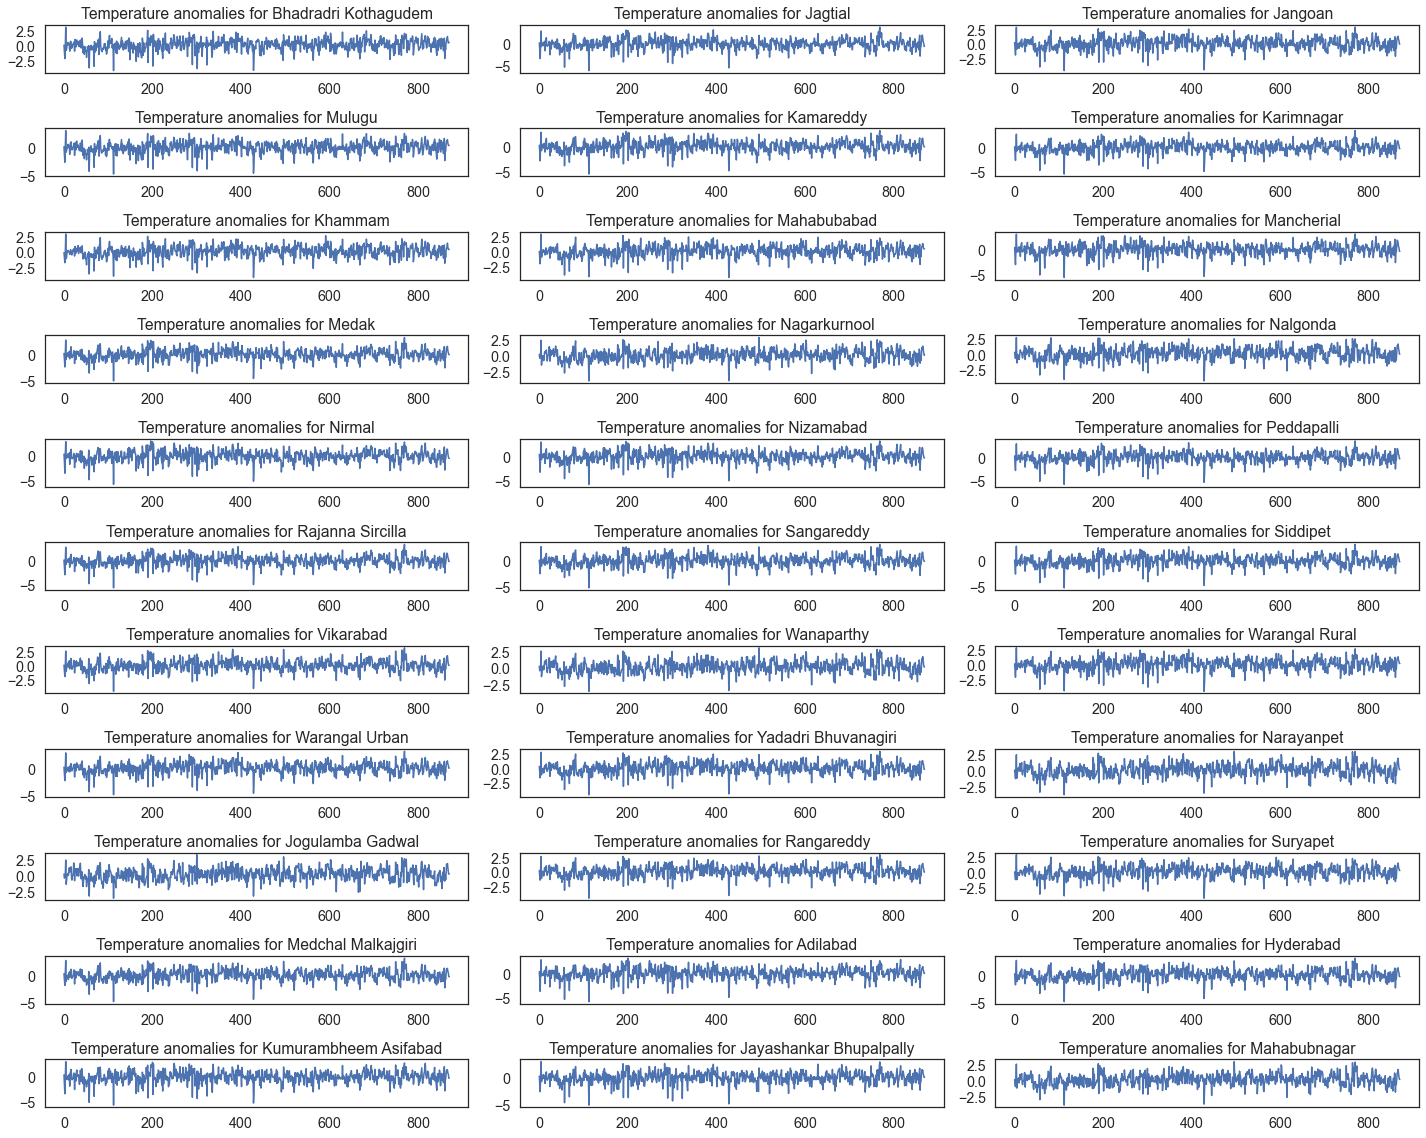

In [52]:
fig, axes = plt.subplots(11,3,figsize=(20,16))
x = 0

for i in range(0,11):
    for j in range(0,3):
        if x > 871:
            break
        data = district_df.iloc[x]
        axes[i][j].set_title("Temperature anomalies for " + str(data["District"]))
        axes[i][j].plot(data[0:871])
        x = x+1
fig.tight_layout()
plt.show()

In [ ]:
arr = []

for i in range(0, len(sample)):
    arr.append(sample["zonalstat"][i]["mean"])

In [110]:
sample["mean"] = arr #arr has all the mean values of zonalstat

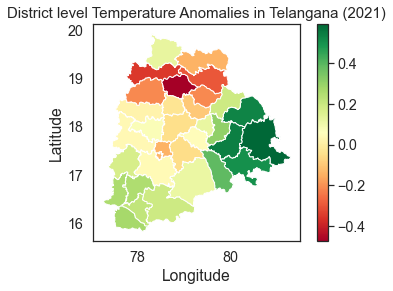

In [111]:
plt.figsize=(6,6)
ax.set_aspect('equal')
sample.plot(column="mean", cmap='RdYlGn', legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('District level Temperature Anomalies in Telangana (2021)',fontsize=15)
ax.set_axis_off()

In [ ]:
#district_df.to_csv("districtanomalies.csv")

# Mandal Anomalies

In [122]:
sample =  gpd.read_file(mandal_path + "/" + mandal_dataset[870])

In [123]:
mandal_df = pd.DataFrame()

In [124]:
arr = []

for i in range(0, len(sample)):
    arr.append(sample["zonalstat"][i]["mean"])

In [142]:
sample["mean"] = np.array(arr)

In [ ]:
sample.head(2)

In [45]:
final_data = []

for i in range(0,len(mandal_dataset)): #for each year
    x = gpd.read_file(mandal_path + "/" + mandal_dataset[i])
    #mandal_df["Mandal"] = x["Mandal_Nam"]
    d_data =  []
    for j in range(0, len(x)): #get one district at a time 
        d_data.append(x["zonalstat"][j]["mean"])
    final_data.append(d_data)

In [46]:
mandal_df = pd.DataFrame(final_data)

In [47]:
mandal_df

,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,590,591
0,0.496567,0.369684,0.426361,0.348877,0.264374,0.601418,0.649133,0.226852,0.291962,0.424698,...,0.163696,0.505165,0.331940,0.384229,0.220825,0.567066,0.509888,0.312531,0.299255,0.263245
1,-0.685089,-0.255756,-0.177979,-0.602020,-0.467773,-1.170715,-1.153770,-0.376221,-1.087433,-0.754410,...,-0.401978,-1.352074,-1.193512,-0.814193,-1.167206,-0.717067,-0.741582,-0.791351,-0.887970,-1.106873
2,-1.477158,-0.151050,-0.276367,-1.383240,-0.545349,-3.740082,-3.790093,-0.202881,-2.324677,-1.651978,...,-0.835297,-2.922409,-2.262939,-1.909907,-2.736298,-2.992618,-2.933785,-2.154053,-2.239380,-2.412323
3,0.340240,0.344934,-0.151733,-0.123810,0.219147,0.524414,0.574585,-0.025055,0.115631,0.034546,...,0.083069,0.426590,0.047424,0.393498,0.414429,0.511488,0.535356,0.503418,0.520050,0.196594
4,2.826767,2.472565,2.807404,2.954803,2.695007,2.978775,2.969746,2.326370,2.919800,2.921844,...,2.421356,3.254364,2.898621,2.850721,2.999023,3.101923,3.060912,2.894470,2.971375,2.950745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,1.393997,1.619147,1.974152,1.550568,1.863281,1.532478,1.500343,1.990906,1.410248,1.366028,...,2.154938,1.419617,1.527496,1.303813,1.475250,1.837958,1.814097,1.771942,1.623566,1.351349
867,0.840988,1.126178,1.031982,0.897827,1.156860,0.943626,0.895735,1.218506,0.826752,0.861206,...,1.178375,0.688881,0.801208,0.782596,0.824677,0.711465,0.715012,0.772949,0.825195,0.822815
868,0.711197,0.859875,0.533905,0.738495,0.538055,0.668739,0.594892,0.579132,0.663910,0.663132,...,0.529480,0.378914,0.676483,0.633821,0.663849,0.214694,0.229000,0.380951,0.642029,0.692291
869,-0.064255,0.163660,0.189148,0.121216,0.257294,0.044609,0.000172,0.288315,0.002289,-0.038925,...,0.266815,-0.115784,0.165375,-0.131512,-0.019714,-0.183681,-0.120204,0.068176,0.003906,-0.008118


In [48]:
mandal_df = mandal_df.T

In [49]:
mandal_df["mandals"] = sample["Mandal_Nam"]
mandal_df["geometry"] = sample["geometry"]
mandal_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,863,864,865,866,867,868,869,870,mandals,geometry
0,0.496567,-0.685089,-1.477158,0.34024,2.826767,-1.105988,-0.451538,0.069626,-0.141266,0.055496,...,0.369781,1.416168,1.455338,1.393997,0.840988,0.711197,-0.064255,0.009689,Abdullapurmet,"POLYGON ((78.58558 17.34675, 78.60189 17.34188..."
1,0.369684,-0.255756,-0.15105,0.344934,2.472565,-1.386389,-0.734131,0.072144,-0.181183,-0.106433,...,0.399396,1.57796,1.198682,1.619147,1.126178,0.859875,0.16366,-0.0177,Achampet,"POLYGON ((79.06269 16.44607, 79.04739 16.45883..."


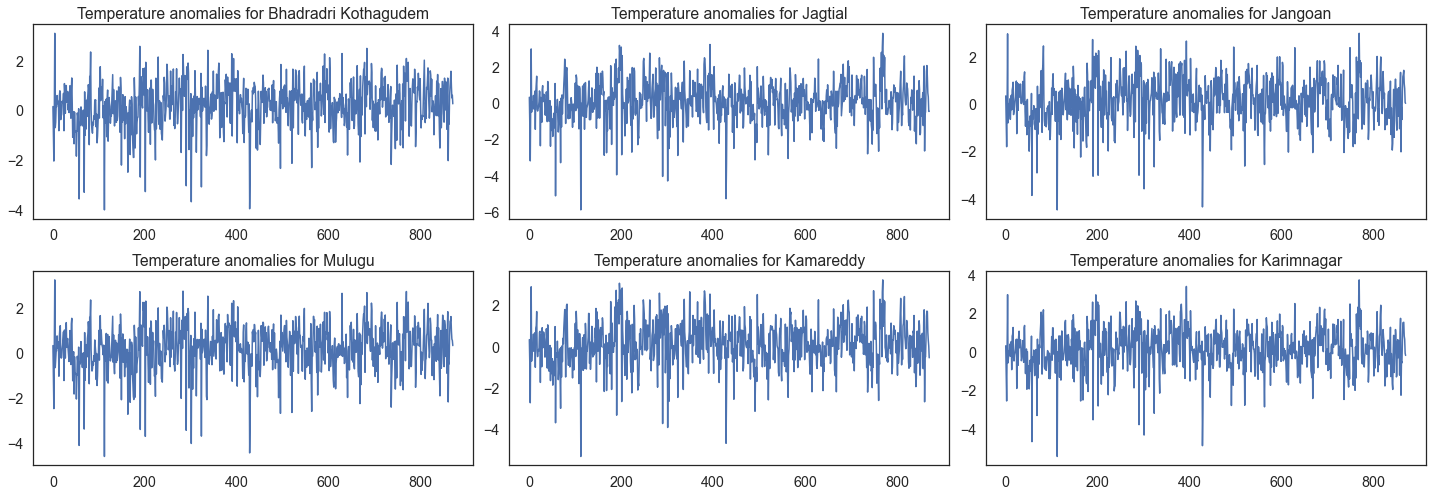

In [55]:
fig, axes = plt.subplots(2,3,figsize=(20,7))
x = 0

for i in range(0,2):
    for j in range(0,3):
        if x > 5:
            break
        data = district_df.iloc[x]
        axes[i][j].set_title("Temperature anomalies for " + str(data["District"]))
        axes[i][j].plot(data[0:871])
        x = x+1
fig.tight_layout()
plt.show()

In [56]:
mandal_df.to_csv("mandalanomalies.csv")

In [160]:
sample['mean'] = sample['mean'].fillna(0)
sample['mean'] = sample["mean"].replace({'N/A': 0}).astype(float)

<Figure size 432x432 with 0 Axes>

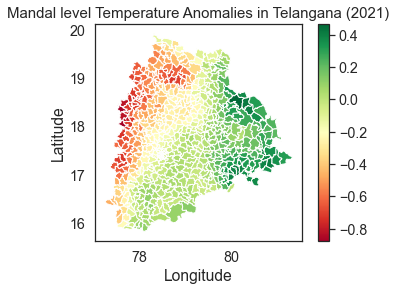

In [163]:
plt.figure(figsize=(6,6))
ax.set_aspect('equal')
sample.plot(column="mean", cmap='RdYlGn', legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.title('Mandal level Temperature Anomalies in Telangana (2021)',fontsize=15)
ax.set_axis_off()